# <center> Tutorial 2: Linear Classification

In [319]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.special import expit  

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

import os

## Table of Contents  

1. [Activation Function](#3.-Activation-Function)
    - Step function
    - Sigmoid function
    - tanh function
    - ReLu function
2. [Artificial Neuron Practice](#4.-Artificial-Neuron-Practice)
    - Custom Design
    - Sklearn Models


In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDClassifier

---

# 1. Activation Function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, only nonlinear activation functions allow such networks to compute nontrivial problems using only a small number of nodes, and such activation functions are called nonlinearities. ([wiki](https://en.wikipedia.org/wiki/Activation_function))

The reasons we use activation functions are :

* To limit the output to the specific values(i.g. 0, 1) or the range(i.g. 0 ~ 1)
* To differentiate the multi-layer neural network or deep neural network from the single-layer neural network

## Step function

In mathematics, a function on the real numbers is called a step function (or staircase function) if it can be written as a finite linear combination of indicator functions of intervals. Informally speaking, a step function is a piecewise constant function having only finitely many pieces.

Below is the function to visualize after getting the activation function as a parameter. 

In [321]:
def step(x): 
    
    # Define the "y"
    y = np.where(x >= 0, 1, 0)  # for each element in x, return 0 if it is less than 0, return 1 otherwise

    return y.astype(np.int_) 

In [322]:
x1= 82  # Last two digits of your Bilkent ID
x2=-x1

x = np.arange(x2, x1, 0.001)    # Define an array of numbers between x2 and x1 with 0.001 resolution
y = step(x)


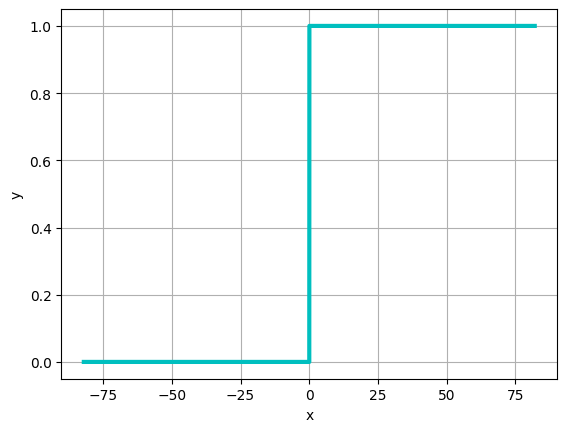

In [323]:
# TO DO

# Plot "y here"
plt.plot(x,y, color='c', lw=3)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


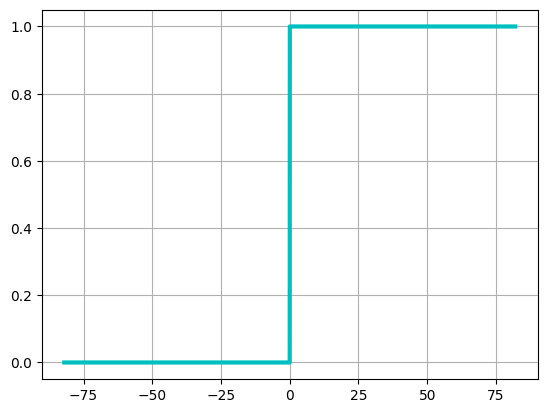

In [324]:
def plot_activation_fn(activation=step):
    # Complete this function, takes the activation function with parameter "x" and output "y" above, then plot the "y"
    x = np.arange(x2, x1, 0.001)
    y = activation(x)
    plt.plot(x, y, color='c', lw=3)
    plt.grid()
    plt.show()
       
plot_activation_fn(activation=step)

## Sigmoid function

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula.

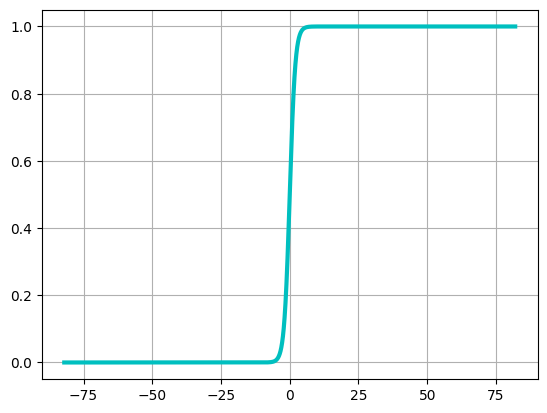

In [325]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))    # Define "y" here
    return y

plot_activation_fn(sigmoid)



## tanh(Hyperbolic tangent)

hyperbolic functions are analogues of the ordinary trigonometric functions, but defined using the hyperbola rather than the circle. Just as the points (cos t, sin t) form a circle with a unit radius, the points (cosh t, sinh t) form the right half of the unit hyperbola. Also, just as the derivatives of sin(t) and cos(t) are cos(t) and –sin(t), the derivatives of sinh(t) and cosh(t) are cosh(t) and +sinh(t).

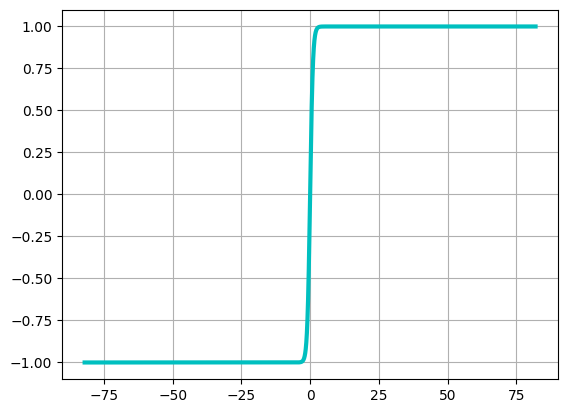

In [326]:
def tanh(x):
    y = np.tanh(x)  # Define "y" here    
    return y

plot_activation_fn(tanh)

## ReLu(Rectified Linear Unit) function

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [327]:
def relu(x):
   y = np.maximum(0, x) # Define y here
   return y

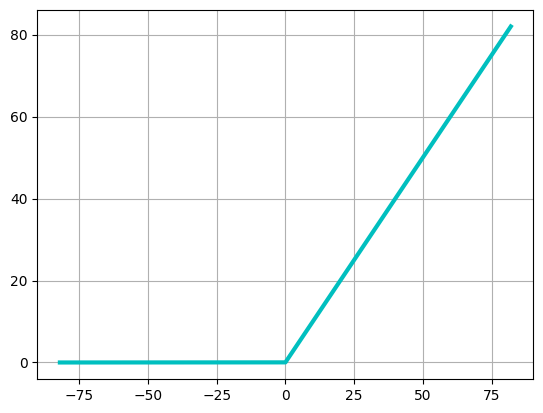

In [328]:
plot_activation_fn(relu)

# 4. Artificial Neuron Practice

In [329]:
X, y = load_iris(return_X_y=True)

In [330]:
X.shape

(150, 4)

In [331]:
sample_count, feature_count = X.shape   # Return the (number of samples, number of features)

In [332]:
y.shape  #> (n_samples)

(150,)

In [333]:
X[:5]   # Colums are corresponding to the features : "sepal-length", "sepal-width", "petal-length", "petal-width"

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [334]:
y[:5]

array([0, 0, 0, 0, 0])

In [335]:
np.unique(y, return_counts=True)  #> 0: setosa, 1: versicolor, 2: virginica

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

# To make it simple
* data: select petal length and width
* target : for binary classification between setosa(0) / non-setosa(1)

In [336]:
data = X[:, 2:] #  select petal length and width
target = np.where(y == 0, 0, 1) # for binary classification between setosa(0) / non-setosa(1) as target

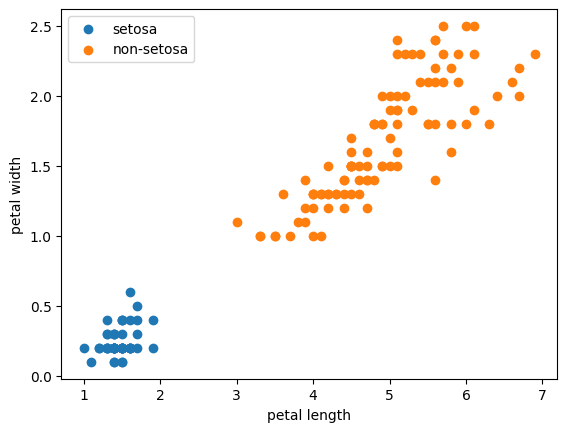

In [337]:
plt.scatter(data[target== 0, 0], data[target == 0, 1], label='setosa')
plt.scatter(data[target== 1, 0], data[target == 1, 1], label='non-setosa')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [338]:
b = -2.0  # bias
w = np.array([0.7, 1.2])  # weight 

In [339]:
z = np.dot(data, w) + b
z

array([-0.78, -0.78, -0.85, -0.71, -0.78, -0.33, -0.66, -0.71, -0.78,
       -0.83, -0.71, -0.64, -0.9 , -1.11, -0.92, -0.47, -0.61, -0.66,
       -0.45, -0.59, -0.57, -0.47, -1.06, -0.21, -0.43, -0.64, -0.4 ,
       -0.71, -0.78, -0.64, -0.64, -0.47, -0.83, -0.78, -0.71, -0.92,
       -0.85, -0.9 , -0.85, -0.71, -0.73, -0.73, -0.85, -0.16, -0.19,
       -0.66, -0.64, -0.78, -0.71, -0.78,  2.97,  2.95,  3.23,  2.36,
        3.02,  2.71,  3.21,  1.51,  2.78,  2.41,  1.65,  2.74,  2.  ,
        2.97,  2.08,  2.76,  2.95,  2.07,  2.95,  2.05,  3.52,  2.36,
        3.23,  2.73,  2.57,  2.76,  3.04,  3.54,  2.95,  1.65,  1.98,
        1.79,  2.17,  3.49,  2.95,  3.07,  3.09,  2.64,  2.43,  2.36,
        2.52,  2.9 ,  2.24,  1.51,  2.5 ,  2.38,  2.5 ,  2.57,  1.42,
        2.43,  5.2 ,  3.85,  4.65,  4.08,  4.7 ,  5.14,  3.19,  4.57,
        4.22,  5.27,  3.97,  3.99,  4.37,  3.9 ,  4.45,  4.47,  4.01,
        5.33,  5.59,  3.3 ,  4.75,  3.83,  5.09,  3.59,  4.51,  4.36,
        3.52,  3.59,

In [340]:
predictions = step(z)
print(predictions)
np.mean(target == predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


1.0

In [341]:
class SimplePerceptron:
    def fit(self, X, y):
        self.intercept_ = np.array([-2.0])  # bias
        self.coef_ = np.array([0.7, 1.2])   # weights 

    def forward(self, X):
        z = np.dot(X, self.coef_) + self.intercept_ # z = data*weights+bias
        return z 

    def activation(self, x):   # used step here
        y = x > 0
        return y.astype(np.int_)

    def predict(self, X):     
        z = self.forward(X) # forward on the data
        y = self.activation(z) # apply the activation function
        return y 

    def score(self, X, y):
        y_pred = self.predict(X)    # prediction 
        acc = np.mean(y == y_pred)  # Complete mean accuracy
        return acc
    

In [342]:
neuron = SimplePerceptron()  # create neuron incidence

In [343]:
# TO DO: fit the model parameters here to neuron
neuron.fit(data, target)

In [344]:
#  TO DO: Print coefficient values are given after model fit
print(neuron.coef_)

[0.7 1.2]


In [345]:
#  TO DO: Forward on the model
neuron.forward(data)

array([-0.78, -0.78, -0.85, -0.71, -0.78, -0.33, -0.66, -0.71, -0.78,
       -0.83, -0.71, -0.64, -0.9 , -1.11, -0.92, -0.47, -0.61, -0.66,
       -0.45, -0.59, -0.57, -0.47, -1.06, -0.21, -0.43, -0.64, -0.4 ,
       -0.71, -0.78, -0.64, -0.64, -0.47, -0.83, -0.78, -0.71, -0.92,
       -0.85, -0.9 , -0.85, -0.71, -0.73, -0.73, -0.85, -0.16, -0.19,
       -0.66, -0.64, -0.78, -0.71, -0.78,  2.97,  2.95,  3.23,  2.36,
        3.02,  2.71,  3.21,  1.51,  2.78,  2.41,  1.65,  2.74,  2.  ,
        2.97,  2.08,  2.76,  2.95,  2.07,  2.95,  2.05,  3.52,  2.36,
        3.23,  2.73,  2.57,  2.76,  3.04,  3.54,  2.95,  1.65,  1.98,
        1.79,  2.17,  3.49,  2.95,  3.07,  3.09,  2.64,  2.43,  2.36,
        2.52,  2.9 ,  2.24,  1.51,  2.5 ,  2.38,  2.5 ,  2.57,  1.42,
        2.43,  5.2 ,  3.85,  4.65,  4.08,  4.7 ,  5.14,  3.19,  4.57,
        4.22,  5.27,  3.97,  3.99,  4.37,  3.9 ,  4.45,  4.47,  4.01,
        5.33,  5.59,  3.3 ,  4.75,  3.83,  5.09,  3.59,  4.51,  4.36,
        3.52,  3.59,

In [346]:
#  TO DO: Peediction here using the "neuron"
neuron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [347]:
#  TO DO: Model performance
neuron.score(data, target)

1.0

## sklearn.linear_model.Perceptron 

In [348]:
perceptron = Perceptron(random_state=42)  # model incidence

In [349]:
# Fit the data here
perceptron.fit(data, target)

Perceptron(random_state=42)

In [350]:
#  TO DO: Print coefficient values are given after model fit
print(perceptron.coef_)

[[1.4 2.2]]


In [351]:
#  TO DO: Peediction here using the "perceptron"
perceptron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [352]:
#  TO DO: Final Model performance
perceptron.score(data, target)

1.0

## Sigmoid neuron activation

In [353]:
class SimpleNeuron:
    def fit(self, X, y): 
        self.intercept_ = np.array([-35.6])
        self.coef_ = np.array([11.8, 17.0])

    def forward(self, X): 
        z = np.dot(X, self.coef_) + self.intercept_ # data*weights+bias
        return z 

    def activation(self, x):          
        y = sigmoid(x)  # use the sigmoid you wrote here
        return y 

    def predict_proba(self, X):
        z = self.forward(X)  # 
        y = self.activation(z)  # sigmoid 
        probas = np.c_[1 - y, y]  
        return probas 

    def predict(self, X): 
        probas = self.predict_proba(X)
        preds = np.argmax(probas, axis=1)
        return preds

    def score(self, X, y):
        preds = self.predict(X) # prediction 
        acc = np.mean(preds == y)   # mean accuracy
        return acc

In [354]:
neuron = SimpleNeuron()

In [355]:
# TO DO: Fit the data here
neuron.fit(data, target)

In [356]:
#  TO DO: Print coefficient values are given after model fit
print(neuron.coef_)

[11.8 17. ]


In [357]:
z = neuron.forward(data)    # forward the model
y = neuron.activation(z)    # apply the activation function
y = neuron.predict_proba(data)[:, 1]    # probability of target 1 (non-setosa)


In [358]:
pred_probs = neuron.predict_proba(data) # prediction probabilities

In [359]:
#  TO DO: Peediction here using the "neuron"
neuron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [360]:
#  TO DO: Final Model performance
neuron.score(data, target)

1.0